***TEST 1 - BARRAS Célia***

**Import of modules**

In [133]:
import os
import struct
import gzip
import numpy as np

**3 functions to be able to calculate the accuracy of the model**

In [134]:
#1st function : the MSE 
def MSE(y, y_pred):
    mse = 0
    i = 0

    # to browse the array of y
    while(i < y.size):
        mse = mse + (y_pred[i] - y[i])**2   # mathematical function of the mse
        i = i+1

    return (mse/i)      # to divide by i to get the average 

In [135]:
#2nd function : to estimate the convergence curve of the output of the MSE function
def logloss(y, y_pred):
    hp = 0
    i = 0
    y_pred = np.clip(y_pred, a_min=10**-5, a_max=1-10**-5)
    # to browse the array of y
    while(i < y.size):
        hp = hp + ( y[i] * np.log(y_pred[i]) + (1-y[i]) * np.log(1 - y_pred[i]))    # mathematical function
        i = i + 1

    return (hp/i)*-1       # divide to get the average

In [136]:
# 3rd function : the accuracy function
# we want the number of good response (where y_pred == y)
def accuracy(y, y_pred):
    i = 0
    count = 0

    # to browse the array of y
    while(i < y.size) :
        if(y[i] == y_pred[i]):  # condition of a good response
            count = count +1
        i = i+1

    return count/y.size     # to obtain the proportion

**Download of the data**

In [137]:
# association of each of the labels with a different number
labels={
 0:'T-shirt/top',
 1:'Trouser',
 2:'Pullover',
 3:'Dress',
 4:'Coat',
 5:'Sandal',
 6:'Shirt',
 7:'Sneaker',
 8:'Bag',
 9:'Ankle boot',
}

In [138]:
# function to load data 
# take as arguments : the path of the data fashion and the kind to be treated
def load_mnist(path, kind='train'):

    # Load MNIST data from `path`
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    # unzip data
    with gzip.open(labels_path, 'rb') as lbpath:
        struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [139]:
# using the function to store data in variables
x_train, y_train = load_mnist(r'MNIST - ex\data\fashion', kind='train')     # data to train the model
x_test, y_test = load_mnist(r'MNIST - ex\data\fashion', kind='t10k')        # data to test the model

The first row of variables in the cell below corresponds to the values ​​used for training the knn model, i.e. to teach the model to relate an input (x_train) to the output that corresponds to it (y_train).

The second row of variables in the cell above corresponds to the values ​​that will be used to test the model once it is trained. We will enter the input data (x_test) and we will obtain a prediction (y_pred) that will have to be compared with the initial outputs (y_test). By comparing them, we will obtain the accuracy of the system.

**Use of the knn method**

In [140]:
# to train the model, we're using the KNN method 
from sklearn.neighbors import KNeighborsClassifier

nn = KNeighborsClassifier(n_neighbors=3)
nn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [141]:
from sklearn.metrics import accuracy_score
pred = nn.predict(x_test)          # using the library to predict results     

# calcul of the accuracy
print(accuracy_score(y_test, pred)) # using the library
print(accuracy(y_test, pred))       # using my own function

0.8541
0.8541


We can observe that the two functions, the one provided by the library and the one I coded, give the same result (which is good news ...).

To find what number to put as an argument of the KNeighborsClassifiers function (the number of neighbors), I started by testing with the number 10. Then I decreased that number by comparing the precision for each number of neighbors. 
- numbers of neighbors : accuracy 
- 10 : 0.815
- 7 : 0.854
- 5 : 0.8554
- 3 : 0.8541   so the precision starts to decrease again when the number of neighbors is too small


**Plot of 12 images**

In [142]:
# import of the necessary libraries 
from matplotlib import pyplot as plt,cm

def show_img(im,figsize=None,ax=None,cmap=cm.binary):
    if not ax: fig,ax = plt.subplots(figsize = figsize)
    ax.imshow(im,cmap=cmap)
    return ax

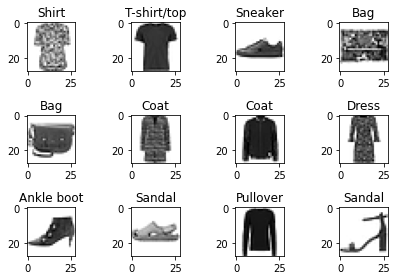

In [178]:
fig, ax = plt.subplots(nrows=3, ncols=4)
for i, axes in enumerate(ax.flat):
    show_img(x_test[i].reshape([28,28]), ax=axes)
    axes.set_title(labels[y_test[i]])
fig.tight_layout()

**Training the model while reducing number of trained images**

In [149]:
np.random.seed()
train_idx = np.random.permutation(2000)     # only 2000 trained images
test_idx = np.random.permutation(1000)      # only 1000 images for testing

x_train = x_train[train_idx]
y_train = y_train[train_idx]
x_test = x_test[test_idx]
y_test = y_test[test_idx]

nn.fit(x_train, y_train)        # fitting the model with less images

KNeighborsClassifier(n_neighbors=3)

In [163]:
# accuracy
pred = nn.predict(x_test)
print(accuracy_score(y_test,pred))
print(accuracy(y_test, pred))

0.79
0.79


It can be seen that the accuracy of the model has decreased compared to the test previously with more values. We conclude that to improve the precision, more values ​​are needed to train and test the model to learn more.
In this case, the model will take much more time to be trained but the accuracy will be higher.

***Customized KNN***

We will be using the class below this time to train the model.

In [154]:
class CustomNearestNeighbor():
	def __init__(self,k):
		self.k = k
		self.eps=1e-6
	def fit(self,X,y=None):
		self.X_train = np.array(X)
		if y is not None:
			self.y_train = y
			self.n_classes = np.unique(y).shape[0]
			
	def kneighbors(self,X):
		'''
		Return sorted k distance and k indices of input X
		'''
		X = np.array(X)
		dist = np.zeros([len(X),self.k])
		idxs = np.zeros([len(X),self.k],dtype=int)
		#euclidian distance
		for i,x in enumerate(X):
			temp_dist = np.linalg.norm(x - self.X_train,axis=1)
			idxs[i] = (np.argsort(temp_dist)[:self.k])
			dist[i] = temp_dist[idxs[i]]      
		return [dist,idxs]
	def predict_classification(self,X_test,weighted=False):
		if not hasattr(self,'y_train'):
			raise ValueError('y and n_class are undefined')
			
		dist,idxs = self.kneighbors(X_test)
		inv_dist = 1/(dist+ self.eps) # eps to avoid divided by 0
		
		y_pred = np.zeros(idxs.shape[0])
		wc = np.zeros([idxs.shape[0],self.n_classes])
		class_sorted = np.zeros([idxs.shape[0],self.n_classes],dtype=int)     
		for i,idx in enumerate(idxs):
			# calculate weighted count (wc)
			class_counter = np.bincount(self.y_train[idx],weights=inv_dist[i] if weighted else None,minlength=self.n_classes)
			class_sorted[i] = (np.argsort(class_counter)[::-1])
			wc[i] = class_counter
			y_pred[i]=class_sorted[i][0]
		return y_pred,wc,class_sorted

In [155]:
c_nn = CustomNearestNeighbor(k=10)
c_nn.fit(x_train, y_train)

In [156]:
y_pred,weighted_counter,class_sorted=c_nn.predict_classification(x_test,weighted=True)
accuracy_score(y_test,y_pred)

0.556

In [157]:
# we will use this function to plot 5 images and evaluate them
def evaluate(idx):
 img = x_test[idx].reshape([28,28]) #28 bcz its the sqrt of the size 784
 plt.imshow(img,cmap=cm.binary)
 print(f'Weights (in order): {sorted(weighted_counter[idx],reverse=True)}')
 print(f'Predictions (in order): {[labels[i] for i in class_sorted[idx]]}')

Weights (in order): [0.0020660640791188185, 0.0012772382807867408, 0.0008573704810425337, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Predictions (in order): ['T-shirt/top', 'Coat', 'Pullover', 'Ankle boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Dress', 'Trouser']


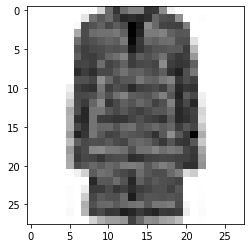

In [158]:
evaluate(5)
# incorrect evaluation
# Based on weighted_counter, my KNN classifier results in a close weight between Tshirt/top class and coat class
# because of the accuracy is not at 100%, there are somme errors

Weights (in order): [0.002683568993144012, 0.0003263219762916548, 0.00032268211616391846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Predictions (in order): ['Bag', 'Ankle boot', 'Sandal', 'Sneaker', 'Shirt', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top']


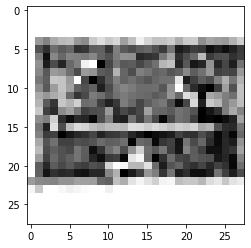

In [159]:
evaluate(3)
# Correct
# Based on weighted_counter, my KNN classifier results in a weight to the class 8 (Bag)

Weights (in order): [0.0032966399976896185, 0.0004020398501225665, 0.00039667635246579824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Predictions (in order): ['Ankle boot', 'Shirt', 'Bag', 'Sneaker', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top']


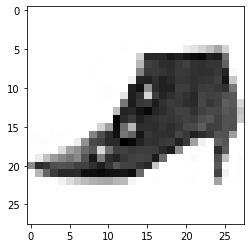

In [160]:
evaluate(8)
# correct

Weights (in order): [0.002587723163570969, 0.0010501048725559195, 0.0010305344027380656, 0.000510812909387052, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Predictions (in order): ['Sandal', 'Sneaker', 'Dress', 'Trouser', 'Ankle boot', 'Bag', 'Shirt', 'Coat', 'Pullover', 'T-shirt/top']


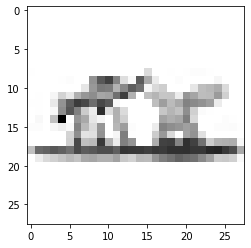

In [161]:
evaluate(100)
# correct